In [55]:
import sys

from Queue import Queue
from PIL import Image


def iswhite(value):
    if value == (255,255,255,255):
        return True
    elif value == (236, 249, 255, 255):
        return True

def getadjacent(n):
    x,y = n
    listAdj=[]
    if x>0:
        listAdj.append((x-1,y))
    if y>0:
        listAdj.append((x,y-1))
    if x<width-1:
        listAdj.append((x+1,y))
    if y<height-1:
        listAdj.append((x,y+1))
    return listAdj

def BFS(start, end, pixels):

    queue = Queue()
    queue.put([start]) # Wrapping the start tuple in a list

    while not queue.empty():

        path = queue.get() 
        pixel = path[-1]

        if pixel == end:
            return path

        for adjacent in getadjacent(pixel):
            x,y = adjacent
            if iswhite(pixels[x,y]):
                pixels[x,y] = (127,127,127,127) # see note
                new_path = list(path)
                new_path.append(adjacent)
                queue.put(new_path)

    print "Queue has been exhausted. No answer was found."

In [56]:
# invoke: python mazesolver.py <mazefile> <outputfile>[.jpg|.png|etc.]
maze="/Users/gilles/Desktop/Laby.png"
#maze="/Users/gilles/Desktop/TEMP.png"
solution=maze.replace(".png","-solved.png")
#Laby.png
start = (715,18)
end = (793,735)
#start = (241,5)
#end = (260,590)
base_img = Image.open(maze)
width,height=base_img.size
print width,height
base_pixels = base_img.load()
print base_pixels[start]
print base_pixels[end]

1503 1194
(249, 253, 252, 255)
(0, 0, 9, 255)


In [57]:
print base_pixels[25,1029]

(254, 255, 255, 255)


In [58]:
path_img = Image.open(maze)
path_pixels = path_img.load()
path_pixels[start] = (255,0,0,255)
path_pixels[end] = (255,0,0,255)

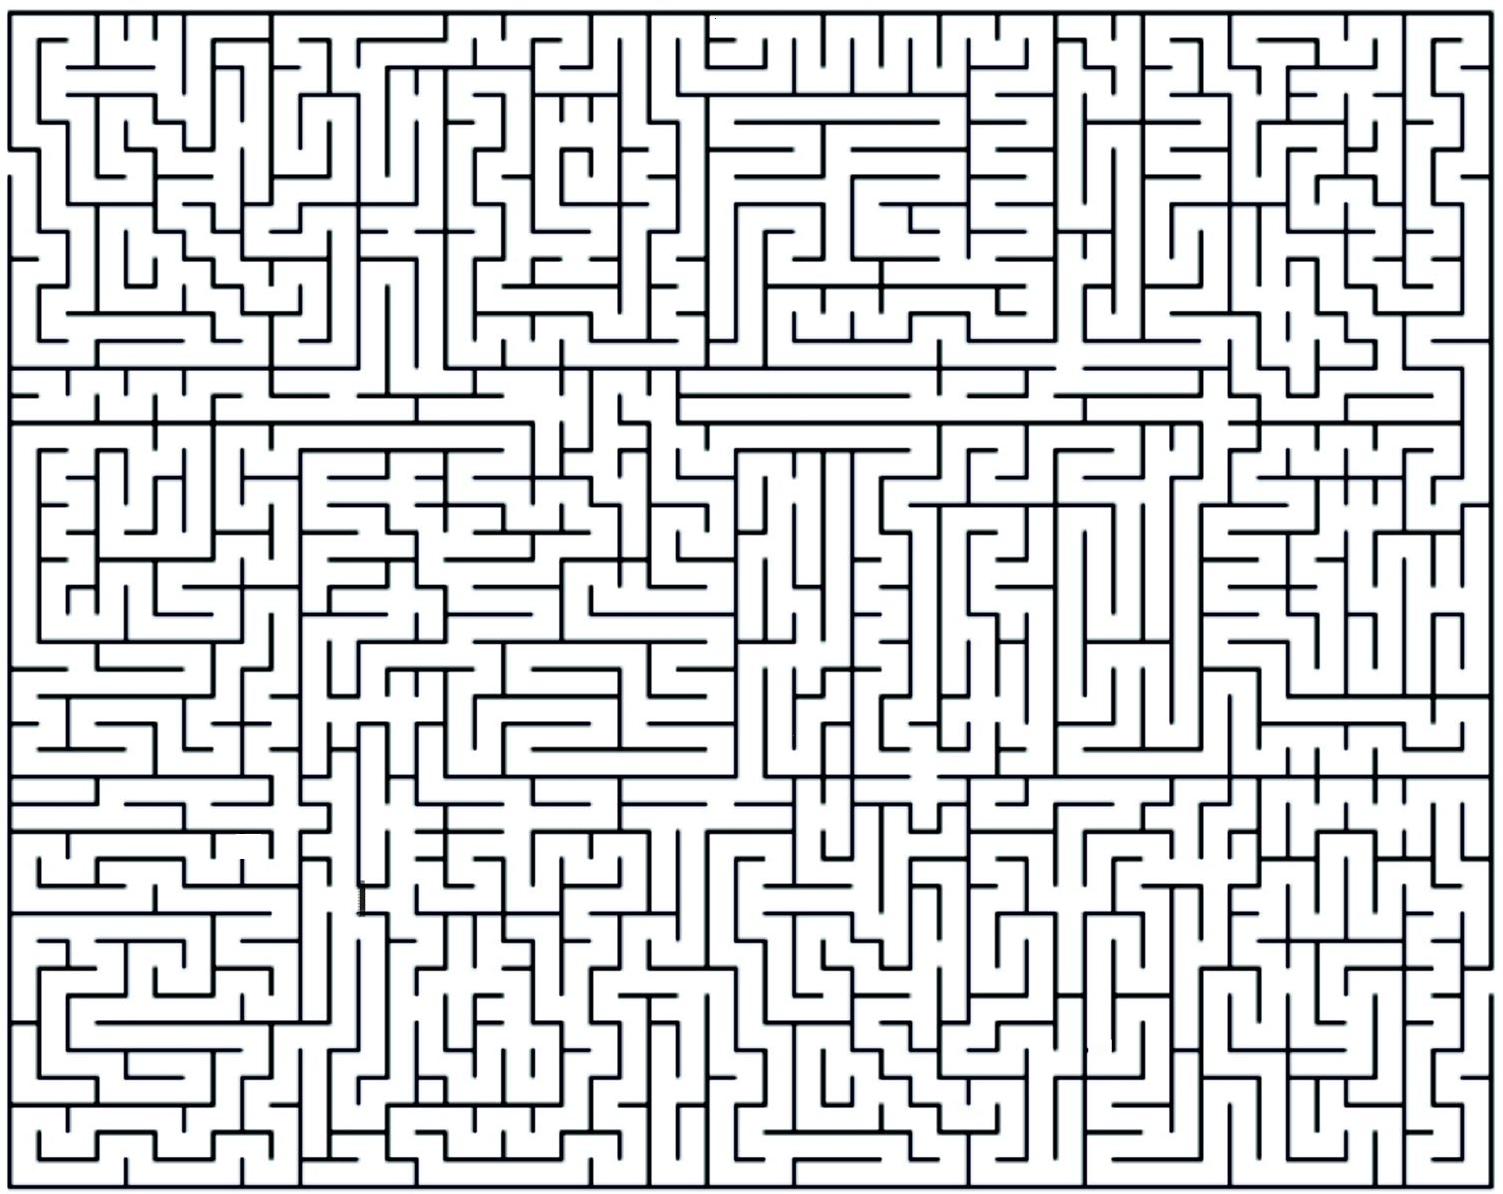

In [59]:
path_img

In [54]:
path = BFS(start, end, base_pixels)

Queue has been exhausted. No answer was found.


In [25]:
for position in path:
    x,y = position
    path_pixels[x,y] = (255,0,0,255) # red

TypeError: 'NoneType' object is not iterable

In [23]:
path_img.save(solution)

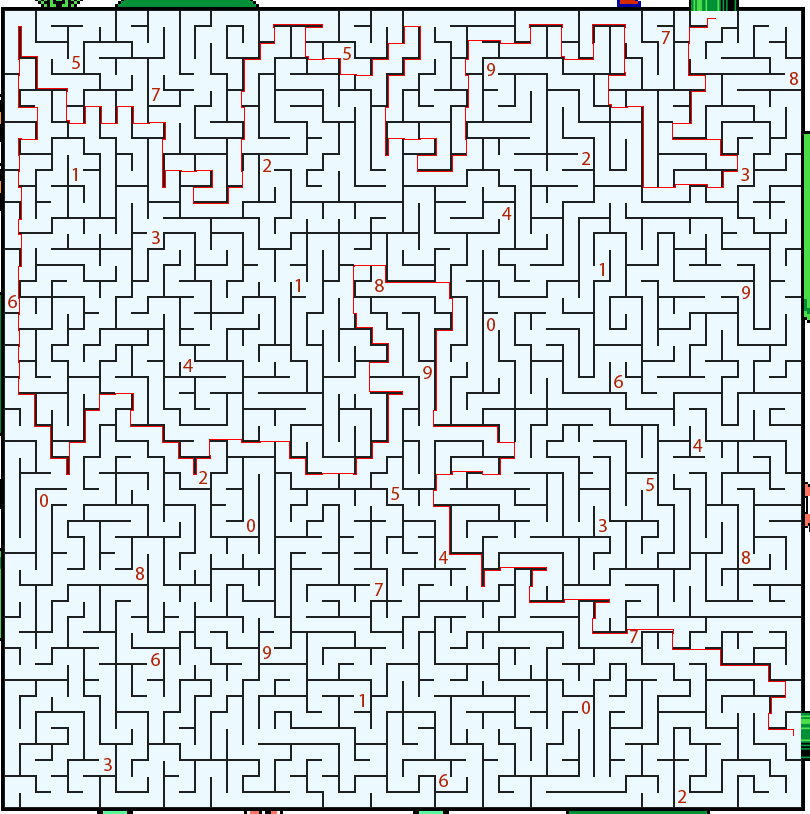

In [24]:
path_img